# Plot initial spectra together for comparison

In [1]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times']
rcParams['font.size'] = 22
import matplotlib.pyplot as plt

from snewpy.neutrino import Flavor
from snewpy.models.ccsn import Fornax_2021, Nakazato_2013, Kuroda_2020
from snewpy.models.ccsn import Tamborra_2014, Warren_2020

In [2]:
snewpy_dir = '/Users/joe/src/snewpy/models'
fornax = Fornax_2021(f'{snewpy_dir}/Fornax_2021/lum_spec_20M_r10000_dat.h5')
nakazato = Nakazato_2013(f'{snewpy_dir}/Nakazato_2013/nakazato-shen-z0.004-t_rev100ms-s20.0.fits')
kuroda = Kuroda_2020(f'{snewpy_dir}/Kuroda_2020/LnuR00B00.dat')
tamborra = Tamborra_2014(f'{snewpy_dir}/Tamborra_2014/s20.0c_3D_dir1')
warren = Warren_2020(f'{snewpy_dir}/Warren_2020/stir_a1.23/stir_multimessenger_a1.23_m10.0.h5')


/Users/joe/opt/anaconda3/envs/KLSN/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other


FileNotFoundError: [Errno 2] No such file or directory: '../out/plots/m20-initial.png'

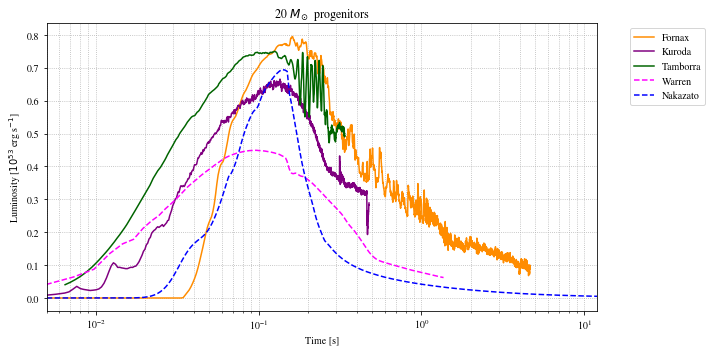

In [3]:
flavor = Flavor.NU_E_BAR

fig, ax = plt.subplots(1,1, figsize=(10,5), tight_layout=True, facecolor='white')


ax.plot(fornax.time, fornax.luminosity[flavor].to('1e53 erg/s'), label='Fornax', color='darkorange')
ax.plot(kuroda.time, kuroda.luminosity[flavor].to('1e53 erg/s'), label='Kuroda', color='purple')
ax.plot(tamborra.time, tamborra.luminosity[flavor].to('1e53 erg/s'), label='Tamborra', color='darkgreen')
ax.plot(warren.time, warren.luminosity[flavor].to('1e53 erg/s'), label='Warren', color='magenta', linestyle='dashed')
ax.plot(nakazato.time, nakazato.luminosity[flavor].to('1e53 erg/s'), label='Nakazato', color='blue', linestyle='dashed')

ax.set(xscale='log',
       xlim=(5e-3, 12),
       xlabel='Time [s]',
       ylabel='Luminosity [$10^{53}$ erg s$^{-1}$]',
       title='20 $M_\odot$ progenitors')
ax.grid(ls=':', which='both')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig('../out/plots/m20-initial', dpi=600)
plt.show()